<a href="https://colab.research.google.com/github/varshini03/customer_segmentation/blob/main/customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import chardet
import plotly.graph_objs as go
from plotly.offline import iplot

In [130]:
df = pd.read_csv('./data.csv', encoding = 'ISO-8859-1', dtype = {'CustomerID':str, 'InvoiceID':str})

In [16]:
df.describe()

,Quantity,UnitPrice
count,541909.000000,541909.000000
mean,9.552250,4.611114
std,218.081158,96.759853
min,-80995.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,38970.000000


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  object 
 7   Country      541909 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 33.1+ MB


In [24]:
cols = df.columns

In [28]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [29]:
df.nunique()

,0
InvoiceNo,25900
StockCode,4070
Description,4223
Quantity,722
InvoiceDate,23260
UnitPrice,1630
CustomerID,4372
Country,38


In [35]:
# traverse rows in df and print if description or customerid is null - both are str
for index, row in df.iterrows():
  if pd.isnull(row['Description']) or pd.isnull(row['CustomerID']):
    print(row)

Streaming output truncated to the last 5000 lines.
UnitPrice                                7.46
CustomerID                                NaN
Country                        United Kingdom
Name: 147295, dtype: object
InvoiceNo                           549100
StockCode                            84692
Description    BOX OF 24 COCKTAIL PARASOLS
Quantity                                10
InvoiceDate                 4/6/2011 11:14
UnitPrice                             1.63
CustomerID                             NaN
Country                     United Kingdom
Name: 147296, dtype: object
InvoiceNo                           549100
StockCode                            84991
Description    60 TEATIME FAIRY CAKE CASES
Quantity                                13
InvoiceDate                 4/6/2011 11:14
UnitPrice                             1.25
CustomerID                             NaN
Country                     United Kingdom
Name: 147297, dtype: object
InvoiceNo                              

KeyboardInterrupt: 

In [37]:
#total rows in df
len(df)

541909

In [131]:
#drop rows with CustomerID = null since imputing null values wont be of any use here
df.dropna(axis = 0, subset = ['CustomerID'], inplace  = True)

In [132]:
#total rows in df
print(df.shape) # we have removed teh null vlaues now

(406829, 8)


In [133]:
# check for duplicates and remove them
print(df.duplicated().sum())

5225


In [134]:
df.drop_duplicates(inplace = True)

In [135]:
print(df.shape) # we have removed teh duplicates now

(401604, 8)


**ANALYSING ORDERS PER COUNTRY**

In [136]:
df.groupby(['InvoiceNo','CustomerID', 'Country']).value_counts()

InvoiceNo  CustomerID  Country         StockCode  Description                          Quantity  InvoiceDate      UnitPrice
536365     17850       United Kingdom  21730      GLASS STAR FROSTED T-LIGHT HOLDER     6        12/1/2010 8:26   4.25         1
                                       22752      SET 7 BABUSHKA NESTING BOXES          2        12/1/2010 8:26   7.65         1
                                       85123A     WHITE HANGING HEART T-LIGHT HOLDER    6        12/1/2010 8:26   2.55         1
                                       84406B     CREAM CUPID HEARTS COAT HANGER        8        12/1/2010 8:26   2.75         1
                                       84029G     KNITTED UNION FLAG HOT WATER BOTTLE   6        12/1/2010 8:26   3.39         1
                                                                                                                              ..
C581490    14397       United Kingdom  22178      VICTORIAN GLASS HANGING T-LIGHT      -12       12/9/2011 9:57   1.95         1
C581499    15498       United Kingdom  M          Manual                               -1        12/9/2011 10:28  224.69       1
C581568    15311       United Kingdom  21258      VICTORIAN SEWING BOX LARGE           -5        12/9/2011 11:57  10.95        1
C581569    17315       United Kingdom  20979      36 PENCILS TUBE RED RETROSPOT        -5        12/9/2011 11:58  1.25         1
                                       84978      HANGING HEART JAR T-LIGHT HOLDER     -1        12/9/2011 11:58  1.25         1
Name: count, Length: 401604, dtype: int64

In [137]:
temp = df[['InvoiceNo', 'CustomerID', 'Country']].groupby(['InvoiceNo', 'CustomerID', 'Country']).value_counts()
print(temp)

InvoiceNo  CustomerID  Country       
536365     17850       United Kingdom     7
536366     17850       United Kingdom     2
536367     13047       United Kingdom    12
536368     13047       United Kingdom     4
536369     13047       United Kingdom     1
                                         ..
C581484    16446       United Kingdom     1
C581490    14397       United Kingdom     2
C581499    15498       United Kingdom     1
C581568    15311       United Kingdom     1
C581569    17315       United Kingdom     2
Name: count, Length: 22190, dtype: int64


In [138]:
print(temp.index)

MultiIndex([( '536365', '17850', 'United Kingdom'),
            ( '536366', '17850', 'United Kingdom'),
            ( '536367', '13047', 'United Kingdom'),
            ( '536368', '13047', 'United Kingdom'),
            ( '536369', '13047', 'United Kingdom'),
            ( '536370', '12583',         'France'),
            ( '536371', '13748', 'United Kingdom'),
            ( '536372', '17850', 'United Kingdom'),
            ( '536373', '17850', 'United Kingdom'),
            ( '536374', '15100', 'United Kingdom'),
            ...
            ('C581464', '15951', 'United Kingdom'),
            ('C581465', '15755', 'United Kingdom'),
            ('C581466', '13883', 'United Kingdom'),
            ('C581468', '13599', 'United Kingdom'),
            ('C581470', '17924', 'United Kingdom'),
            ('C581484', '16446', 'United Kingdom'),
            ('C581490', '14397', 'United Kingdom'),
            ('C581499', '15498', 'United Kingdom'),
            ('C581568', '15311', 'United Kingdom

In [139]:
print(temp.head()) # gives number of products in a transaction

InvoiceNo  CustomerID  Country       
536365     17850       United Kingdom     7
536366     17850       United Kingdom     2
536367     13047       United Kingdom    12
536368     13047       United Kingdom     4
536369     13047       United Kingdom     1
Name: count, dtype: int64


In [140]:
# reset keys and get count of countries
temp = temp.reset_index(drop = False)

In [141]:
temp['Country'].value_counts() #gives number of ordersper country

,count
Country,
United Kingdom,19857
Germany,603
France,458
EIRE,319
Belgium,119
Spain,105
Netherlands,101
Switzerland,71
Portugal,70


In [142]:
print(len(temp['Country'].value_counts())) #gives number of countries

37


In [143]:
countries = temp['Country'].value_counts()

In [144]:
countries.index

Index(['United Kingdom', 'Germany', 'France', 'EIRE', 'Belgium', 'Spain',
       'Netherlands', 'Switzerland', 'Portugal', 'Australia', 'Italy',
       'Finland', 'Sweden', 'Norway', 'Channel Islands', 'Japan', 'Poland',
       'Denmark', 'Cyprus', 'Austria', 'Singapore', 'Malta', 'Unspecified',
       'Iceland', 'USA', 'Canada', 'Greece', 'Israel', 'European Community',
       'Czech Republic', 'Lithuania', 'United Arab Emirates', 'Saudi Arabia',
       'Bahrain', 'Brazil', 'Lebanon', 'RSA'],
      dtype='object', name='Country')

In [145]:
# Data for the map
data = go.Choropleth(
    locations=countries.index,
    locationmode='country names',
    z=countries,
    text=countries.index,
    colorbar_title='Order Count',
    colorscale='Blues'
)

# Layout for the map
layout = go.Layout(
    title='Number of Orders per Country',
)

# Combine data and layout, and plot the map
choromap = go.Figure(data=[data], layout=layout)
iplot(choromap)


shows the number of orders per country visually - largely dominated by the UK

**ANALYSING NUMBER OF PRODCUTS PER TRANSACTION**


In [146]:
orders = df[['InvoiceNo','CustomerID']].groupby(['InvoiceNo', 'CustomerID']).value_counts()

In [147]:
orders.head()

,,count
InvoiceNo,CustomerID,
536365,17850,7
536366,17850,2
536367,13047,12
536368,13047,4
536369,13047,1


In [148]:
orders = orders.reset_index(drop=False)

In [149]:
orders.sort_values('CustomerID')

,InvoiceNo,CustomerID,count
1909,541431,12346,1
18958,C541433,12346,1
2205,542237,12347,29
10173,562032,12347,22
548,537626,12347,31
...,...,...,...
8040,556731,18283,24
2054,541854,18283,44
13860,570715,18287,38
14889,573167,18287,3


In [150]:
cust = orders['CustomerID'].value_counts()
print(cust)

CustomerID
14911    248
12748    224
17841    169
14606    128
13089    118
        ... 
16178      1
12864      1
16305      1
18262      1
15728      1
Name: count, Length: 4372, dtype: int64


above shows that we have both frequent and infrequent customers

**SEGMENTATION BASED ON TOTAL PRICE**

In [167]:
df_cleaned = df.copy(deep = True)
df_cleaned['TotalPrice'] = df_cleaned['Quantity'] * df_cleaned['UnitPrice']
df_cleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34


In [172]:
cust_purchases = df_cleaned.groupby('CustomerID')['TotalPrice'].sum().reset_index()

In [173]:
cust_purchases

,CustomerID,TotalPrice
0,12346,0.00
1,12347,4310.00
2,12348,1797.24
3,12349,1757.55
4,12350,334.40
...,...,...
4367,18280,180.60
4368,18281,80.82
4369,18282,176.60
4370,18283,2045.53


In [175]:
max(cust_purchases['TotalPrice'])

279489.02

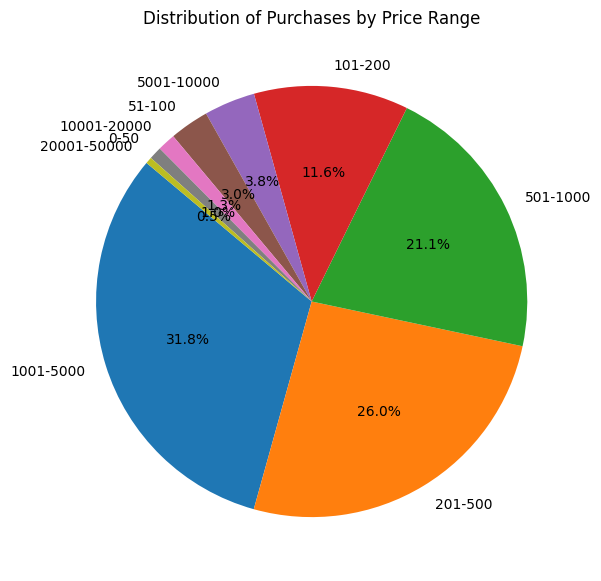

In [178]:
# Define price bins and labels
bins = [0, 50, 100, 200, 500, 1000, 5000, 10000, 20000, 50000]
labels = ['0-50', '51-100', '101-200', '201-500', '501-1000', '1001-5000', '5001-10000', '10001-20000', '20001-50000']

# Categorize prices into bins
cust_purchases['bin'] = pd.cut(cust_purchases['TotalPrice'], bins=bins, labels=labels)

# Count the number of purchases in each bin
bin_counts = cust_purchases['bin'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(10, 7))
plt.pie(bin_counts, labels=bin_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Purchases by Price Range')
plt.show()

a majority of the customers purchase in the range of 200-5000

**ANALYSING PURCHASE FREQUENCY**

In [180]:
# Group by CustomerID to calculate frequency and monetary value
customer_summary = df.groupby('CustomerID').agg({
    'InvoiceNo': 'nunique',  # Frequency of purchases
    'Quantity': 'sum',       # Total quantity purchased
    'UnitPrice': 'sum'       # Monetary value spent
}).reset_index()

customer_summary.columns = ['CustomerID', 'Frequency', 'TotalQuantity', 'TotalSpent']

# Add a Loyalty flag based on frequency
customer_summary['Loyalty'] = customer_summary['Frequency'].apply(lambda x: 'Loyal' if x > 5 else 'Not Loyal')


In [181]:
customer_summary

,CustomerID,Frequency,TotalQuantity,TotalSpent,Loyalty
0,12346,2,0,2.08,Not Loyal
1,12347,7,2458,481.21,Loyal
2,12348,4,2341,178.71,Not Loyal
3,12349,1,631,605.10,Not Loyal
4,12350,1,197,65.30,Not Loyal
...,...,...,...,...,...
4367,18280,1,45,47.65,Not Loyal
4368,18281,1,54,39.36,Not Loyal
4369,18282,3,98,62.68,Not Loyal
4370,18283,16,1357,1174.33,Loyal


In [182]:
customer_summary.sort_values('Frequency',ascending=False)

,CustomerID,Frequency,TotalQuantity,TotalSpent,Loyalty
1895,14911,248,77155,31025.29,Loyal
330,12748,224,23750,14698.31,Loyal
4042,17841,169,22628,19956.37,Loyal
1674,14606,128,5941,7778.46,Loyal
568,13089,118,30742,5155.75,Loyal
...,...,...,...,...,...
1141,13877,1,108,3.53,Not Loyal
2997,16400,1,172,87.41,Not Loyal
1142,13878,1,463,166.76,Not Loyal
1149,13886,1,126,60.88,Not Loyal


In [183]:
# Create a new column to indicate whether a purchase involved a discount
df_cleaned['Discount'] = df_cleaned['Description'].str.contains('DISCOUNT', case=False, na=False).astype(int)

# Filter data for purchases with and without discounts
discounted_purchases = df_cleaned[df_cleaned['Discount'] == 1]
regular_purchases = df_cleaned[df_cleaned['Discount'] == 0]


In [184]:
discounted_purchases

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Discount
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527,United Kingdom,-27.50,1
9038,C537164,D,Discount,-1,12/5/2010 13:21,29.29,14527,United Kingdom,-29.29,1
14498,C537597,D,Discount,-1,12/7/2010 12:34,281.00,15498,United Kingdom,-281.00,1
19392,C537857,D,Discount,-1,12/8/2010 16:00,267.12,17340,United Kingdom,-267.12,1
31134,C538897,D,Discount,-1,12/15/2010 9:14,5.76,16422,United Kingdom,-5.76,1
...,...,...,...,...,...,...,...,...,...,...
479868,C577227,D,Discount,-1,11/18/2011 12:06,19.82,14527,United Kingdom,-19.82,1
479869,C577227,D,Discount,-1,11/18/2011 12:06,16.76,14527,United Kingdom,-16.76,1
493613,C578239,D,Discount,-1,11/23/2011 12:29,26.33,14912,Italy,-26.33,1
516221,C579884,D,Discount,-1,11/30/2011 17:34,20.53,14527,United Kingdom,-20.53,1


In [185]:
# Calculate the frequency for each group
discounted_freq = discounted_purchases.groupby('CustomerID').agg({'InvoiceNo': 'nunique'}).reset_index()
regular_freq = regular_purchases.groupby('CustomerID').agg({'InvoiceNo': 'nunique'}).reset_index()

In [192]:
# Check the first few rows of customer_summary and discounted_freq
print(customer_summary.head())
print(discounted_freq.head())

# Check if 'CustomerID' exists in both DataFrames
print(customer_summary.columns)
print(discounted_freq.columns)

  CustomerID  Frequency  TotalQuantity  TotalSpent    Loyalty  InvoiceNo  \
0      12346          2              0        2.08  Not Loyal        NaN   
1      12347          7           2458      481.21      Loyal        NaN   
2      12348          4           2341      178.71  Not Loyal        NaN   
3      12349          1            631      605.10  Not Loyal        NaN   
4      12350          1            197       65.30  Not Loyal        NaN   

   InvoiceNo_Regular  
0                  2  
1                  7  
2                  4  
3                  1  
4                  1  
  CustomerID  InvoiceNo
0      12830          1
1      12901          1
2      13137          1
3      13316          1
4      13408          4
Index(['CustomerID', 'Frequency', 'TotalQuantity', 'TotalSpent', 'Loyalty',
       'InvoiceNo', 'InvoiceNo_Regular'],
      dtype='object')
Index(['CustomerID', 'InvoiceNo'], dtype='object')


In [193]:
# Ensure CustomerID is a string in both DataFrames
customer_summary['CustomerID'] = customer_summary['CustomerID'].astype(str)
discounted_freq['CustomerID'] = discounted_freq['CustomerID'].astype(str)


In [194]:
# Merge with the main customer summary
customer_summary = customer_summary.merge(discounted_freq, on='CustomerID', how='left', suffixes=('', '_Discount'))




In [189]:
customer_summary = customer_summary.merge(regular_freq, on='CustomerID', how='left', suffixes=('', '_Regular'))

In [195]:
customer_summary

,CustomerID,Frequency,TotalQuantity,TotalSpent,Loyalty,InvoiceNo,InvoiceNo_Regular,InvoiceNo_Discount
0,12346,2,0,2.08,Not Loyal,NaN,2,NaN
1,12347,7,2458,481.21,Loyal,NaN,7,NaN
2,12348,4,2341,178.71,Not Loyal,NaN,4,NaN
3,12349,1,631,605.10,Not Loyal,NaN,1,NaN
4,12350,1,197,65.30,Not Loyal,NaN,1,NaN
...,...,...,...,...,...,...,...,...
4367,18280,1,45,47.65,Not Loyal,NaN,1,NaN
4368,18281,1,54,39.36,Not Loyal,NaN,1,NaN
4369,18282,3,98,62.68,Not Loyal,NaN,3,NaN
4370,18283,16,1357,1174.33,Loyal,NaN,16,NaN


In [196]:
customer_summary['InvoiceNo_Discount'].fillna(0)

,InvoiceNo_Discount
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
4367,0.0
4368,0.0
4369,0.0
4370,0.0


In [197]:
# Fill missing values with 0 (customers who had no discounted/regular purchases)
customer_summary[['InvoiceNo_Discount', 'InvoiceNo_Regular']] = customer_summary[['InvoiceNo_Discount', 'InvoiceNo_Regular']].fillna(0)


In [198]:
# Identify if frequency increase is due to discounts
customer_summary['Frequency_Increase_Due_to_Discount'] = customer_summary['InvoiceNo_Discount'] > customer_summary['InvoiceNo_Regular']

# Analyze loyalty vs. discount impact
loyal_customers = customer_summary[customer_summary['Loyalty'] == 'Loyal']
non_loyal_customers = customer_summary[customer_summary['Loyalty'] == 'Not Loyal']




In [199]:
customer_summary['Frequency_Increase_Due_to_Discount'].unique()

array([False])

In [200]:
print(customer_summary[['InvoiceNo_Discount', 'InvoiceNo_Regular']].describe())


       InvoiceNo_Discount  InvoiceNo_Regular
count         4372.000000        4372.000000
mean             0.014867           5.060842
std              0.448193           9.253043
min              0.000000           1.000000
25%              0.000000           1.000000
50%              0.000000           3.000000
75%              0.000000           5.000000
max             28.000000         247.000000


should try expanding on trying to figure out relationship between discounts and loyalty

**LOYAL VS NON LOYAL CUSTOMERS**

In [201]:
# Count the number of loyal and non-loyal customers
loyalty_counts = customer_summary['Loyalty'].value_counts()

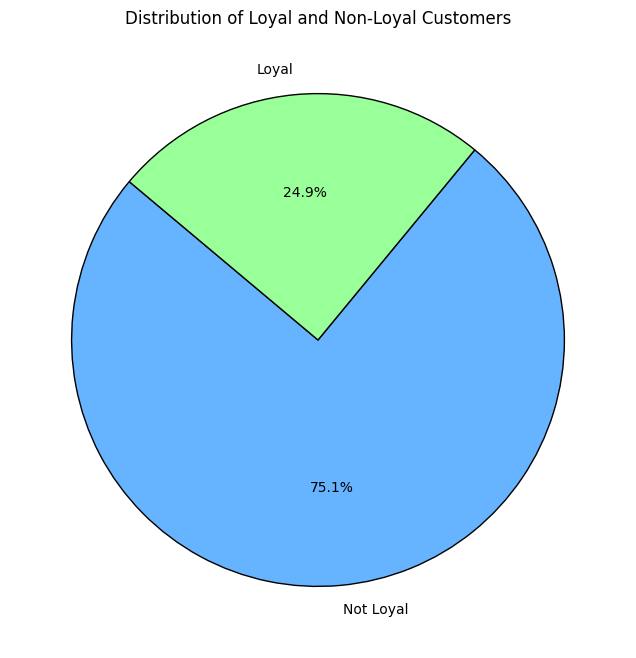

In [202]:
# Labels for the pie chart
labels = loyalty_counts.index

# Colors for the pie chart
colors = ['#66b3ff','#99ff99']

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(loyalty_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, wedgeprops={'edgecolor': 'black'})

# Add a title
plt.title('Distribution of Loyal and Non-Loyal Customers')

# Display the plot
plt.show()

**KMEANS CUSTERING TO SEGMENT CUSTOMERS**

In [203]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
# Select relevant features for clustering
features = customer_summary[['Frequency', 'TotalSpent']]

# Normalize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will 

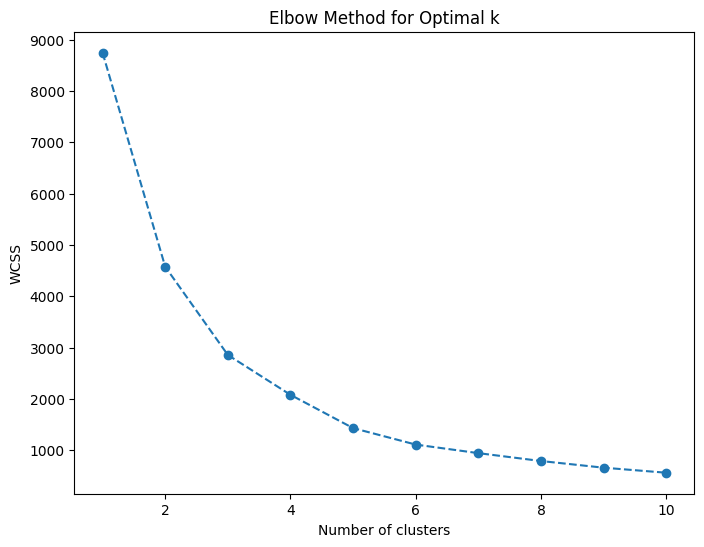

In [204]:
# Elbow Method
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,  max_iter=300, random_state=0)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method result
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


from above, 3 optimal

In [205]:
# Apply K-Means
k = 3  #
kmeans = KMeans(n_clusters=k, max_iter=300,  random_state=0)
clusters = kmeans.fit_predict(scaled_features)

# Add the cluster labels to the DataFrame
customer_summary['Cluster'] = clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [206]:
print("Cluster Centers:\n", kmeans.cluster_centers_)


Cluster Centers:
 [[-0.15725687 -0.0865595 ]
 [11.17547647 21.6719512 ]
 [ 2.46428573  0.88813263]]


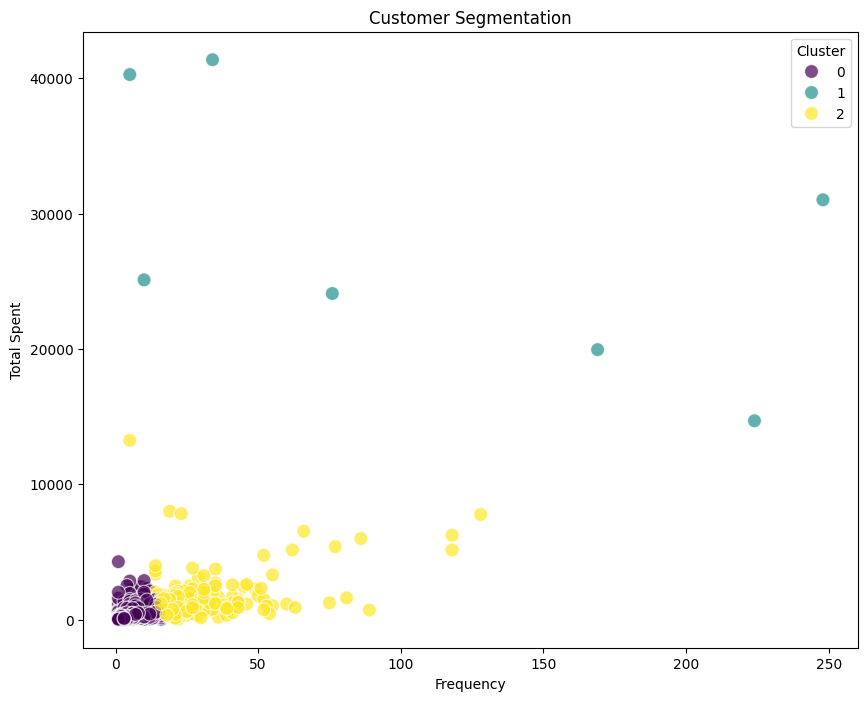

In [207]:
import seaborn as sns

# Create a DataFrame for plotting
plot_df = customer_summary[['Frequency', 'TotalSpent', 'Cluster']]

# Plot clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(data=plot_df, x='Frequency', y='TotalSpent', hue='Cluster', palette='viridis', s=100, alpha=0.7)
plt.title('Customer Segmentation')
plt.xlabel('Frequency')
plt.ylabel('Total Spent')
plt.legend(title='Cluster')
plt.show()


try adding more features to be able to apply pca